In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

NUM_SIMS = 3
CONVERGED = False
USE_SIMULATED_TIME = False
MINUTE = 60

if USE_SIMULATED_TIME:
    X_LABEL = "Simulated time, minutes"
else:
    X_LABEL = "Time step number"

data = {
    "Standard exploration": load_data("poro_eps_default", n_newest=NUM_SIMS),
    "No exploration": load_data("poro_eps0", n_newest=NUM_SIMS),
    "Big exploration": load_data("poro_eps_big", n_newest=NUM_SIMS),
    # "GP": load_data("poro_gp", n_newest=NUM_SIMS),
}


save_media_path = Path('media')
save_media_path.mkdir(exist_ok=True)

Loading data:
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps_default_0.npy
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps_default_1.npy
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps_default_2.npy


/home/firedrake/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


Loading data:
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps0_0.npy
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps0_1.npy
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps0_2.npy
Loading data:
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps_big_0.npy
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps_big_1.npy
/home/firedrake/solver_selector/examples/3.2/performance/poro_eps_big_2.npy


Standard exploration 63.68702379862467 0.6341947317123413
No exploration 63.92181579271952 2.1814050674438477
Big exploration 62.74872144063314 0.15521585941314697


Text(0, 0.5, 'Spent time solving linear systems, s.')

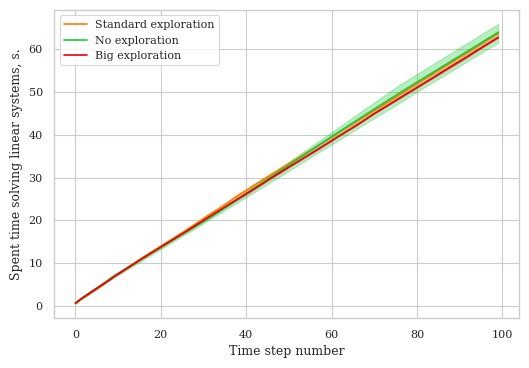

In [2]:
color_iter = 0
best_time = float("inf")
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        res = np.cumsum(
            sum_per_time_step(
                make_solve_linear_system_time(perf, converged=CONVERGED),
                perf,
                converged=CONVERGED,
            )
        )

        results.append(res)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / MINUTE)
        else:
            times.append(np.arange(len(res)))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), (np.max(total) - np.min(total)) / 2)
    if mean[-1] < best_time:
        best_time = mean[-1]
        best_name = name
        best = mean
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

# if save_media_path is not None:
#     plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

Standard exploration 63.68702379862467 0.6341947317123413
No exploration 63.92181579271952 2.1814050674438477
Big exploration 62.74872144063314 0.15521585941314697


Text(0, 0.5, 'Spent time solving linear systems, s.')

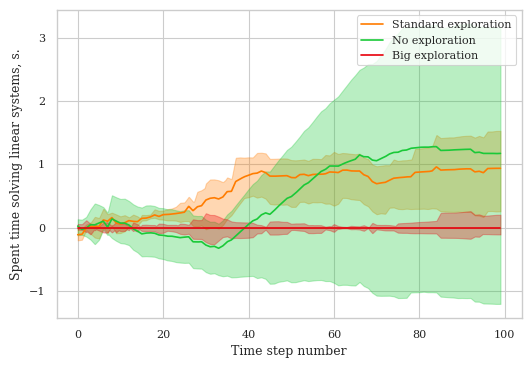

In [3]:
color_iter = 0
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        res = np.cumsum(
            sum_per_time_step(
                make_solve_linear_system_time(perf, converged=CONVERGED),
                perf,
                converged=CONVERGED,
            )
        )

        results.append(res)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / MINUTE)
        else:
            times.append(np.arange(len(res)))


    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list) - best
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), (np.max(total) - np.min(total)) / 2)
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

# if save_media_path is not None:
#     plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

In [4]:
metrics = {
    "coldstart Gaussian process": np.load('performance/poro_gp_0_metrics.npy', allow_pickle=True).item(),
    "coldstart Gradient boosting": np.load('performance/poro_eps0_0_metrics.npy', allow_pickle=True).item(),
}

fig = plt.figure()
for i, (name, metric) in enumerate(metrics.items()):
    plt.plot(
        metric["update_selector_times"],
        label=f"Update performance predictor: {name}",
        color=f"C{i}",
    )
    plt.plot(
        metric["select_solver_times"],
        label=f"Select solver: {name}",
        color=f"C{i}",
        linestyle="--",
    )

solve_best_time = sum_per_time_step(
    make_solve_linear_system_time(data[best_name][0], converged=CONVERGED),
    data[best_name][0],
    converged=CONVERGED,
)
plt.plot(solve_best_time, label="Solve linear systems (best)", color=f"C{i+1}")
plt.yscale("log")
plt.ylabel("Execution time, s.")
plt.xlabel("Simulation time step number")
# fig.legend(loc="center", bbox_to_anchor=(0.5, -.1))
plt.legend(loc="lower right")
# plt.ylim(bottom=1e-2)

FileNotFoundError: [Errno 2] No such file or directory: 'performance/poro_gp_0_metrics.npy'

Standard exploration 0


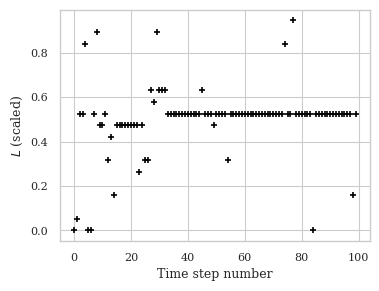

Standard exploration 1


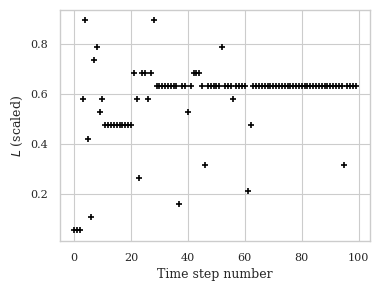

Standard exploration 2


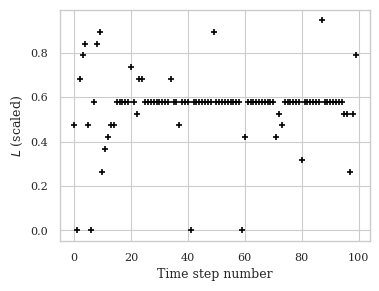

No exploration 0


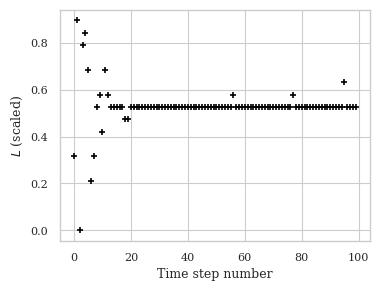

No exploration 1


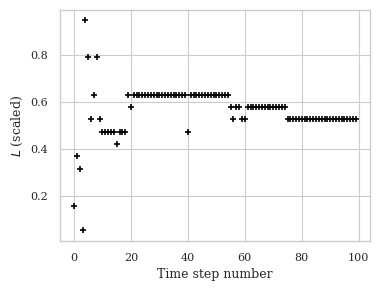

No exploration 2


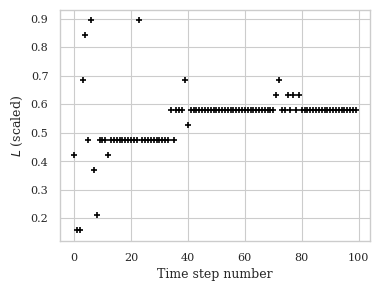

Big exploration 0


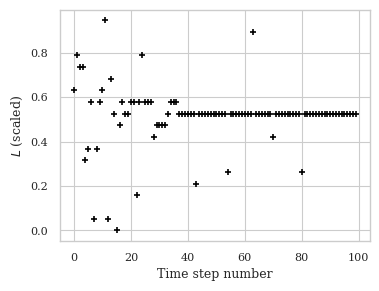

Big exploration 1


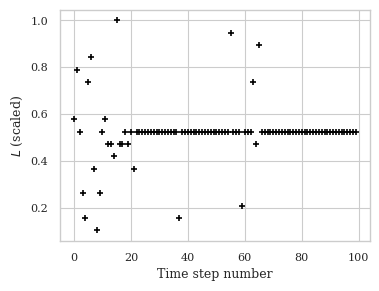

Big exploration 2


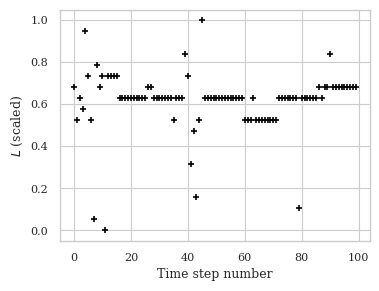

GP 0


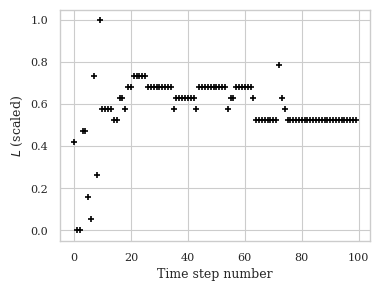

GP 1


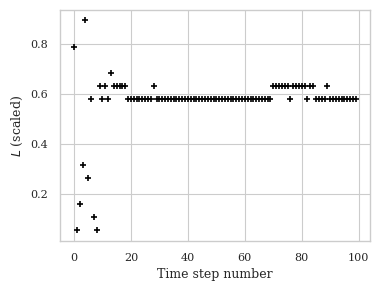

GP 2


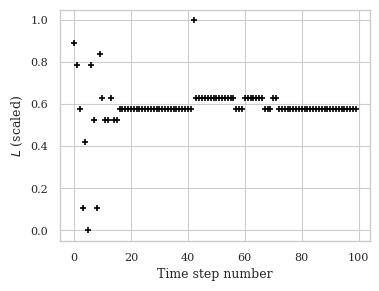

In [ ]:
def make_l_factor(data: Sequence[SolverSelectionData], converged=True):
    l_factors = np.array(
        [
            x.config["gmres"]["preconditioner"]["splitting_fixed_stress"]["l_factor"]
            for x in data
        ]
    )
    if converged:
        return l_factors[make_converged_indices(data)]
    return l_factors


for name, values in data.items():
    # if name not in ("Solver selection",):
    #     continue
    for i, value in enumerate(values):
        print(name, i)
        plt.figure(figsize=(4, 3))
        l_factors = make_l_factor(value, converged=CONVERGED)
        x = make_simulation_time(values[0], converged=CONVERGED) / MINUTE
        if not USE_SIMULATED_TIME:
            x = np.arange(len(l_factors))
        plt.scatter(x, l_factors, label=name, color="black", marker="+")

        plt.ylabel("$L$ (scaled)")
        plt.xlabel(X_LABEL)
        if save_media_path is not None:
            plt.savefig(
                save_media_path / f"poro_lfactor_dt_{name}_{i}.pdf", bbox_inches="tight"
            )
        plt.show()